In [1]:
# Enable plotting
%matplotlib inline

# Supress Warning 
import warnings
warnings.filterwarnings('ignore')

# PyCCD  


> ### Import the Datacube Configuration

In [2]:
import datacube
dc = datacube.Datacube(app = 'my_app', config = '/home/localuser/.datacube.conf')

>### Browse the available Data Cubes on the storage platform    
> You might want to learn more about what data is stored and how it is stored.


In [3]:
list_of_products = dc.list_products()
netCDF_products = list_of_products[list_of_products['format'] == 'NetCDF']
netCDF_products

,name,description,lat,format,lon,platform,time,instrument,product_type,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
61,alos2_jjfast_scansar_tile_colombia,ALOS2 PALSAR JJFAST tile in DN format processe...,None,NetCDF,None,ALOS_2,None,PALSAR,tile,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
50,alos2_palsar_colombia,ALOS2 PALSAR tile in DN format processed for t...,None,NetCDF,None,ALOS_2,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
51,alos2_palsar_kenya,ALOS2 PALSAR tile in DN format processed for t...,None,NetCDF,None,ALOS_2,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
52,alos2_palsar_vietnam,ALOS2 PALSAR tile in DN format processed for t...,None,NetCDF,None,ALOS_2,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
53,alos_palsar_colombia,ALOS PALSAR tile in DN format processed for th...,None,NetCDF,None,ALOS,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
54,alos_palsar_kenya,ALOS PALSAR tile in DN format processed for th...,None,NetCDF,None,ALOS,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
55,alos_palsar_vietnam,ALOS PALSAR tile in DN format processed for th...,None,NetCDF,None,ALOS,None,PALSAR,gamma0,EPSG:4326,"[-0.0002666666667, 0.0002666666667]","[0.5333333334, 0.5333333334]","(latitude, longitude)"
14,gpm_imerg_gis_daily_global,Global NetCDF GPM IMERG GIS data,None,NetCDF,None,GPM,None,GPM,daily,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"
15,gpm_imerg_gis_monthly_global,Global NetCDF GPM IMERG GIS data,None,NetCDF,None,GPM,None,GPM,monthly,EPSG:4326,"[-0.1, 0.1]","[90, 180]","(latitude, longitude)"


>### Pick a product  
>Use the platform names from the previous block to select a small Data Cube. The data_access_api utility will give you lat, lon, and time bounds of your Data Cube.   

In [4]:
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi(config = '/home/localuser/.datacube.conf')

platform = "LANDSAT_7"

product = "ls7_ledaps_bangladesh"
product = "ls7_ledaps_colombia"  

# Get Coordinates
coordinates = api.get_full_dataset_extent(platform = platform, product = product)

> #### Display Lat-Lon and Time Bounds

In [5]:
latitude_extents = (min(coordinates['latitude'].values),max(coordinates['latitude'].values))
print( latitude_extents )

(-0.94618316250000012, 2.4022878314999998)


In [6]:
longitude_extents = (min(coordinates['longitude'].values),max(coordinates['longitude'].values))
print( longitude_extents )

(-76.517724847500006, -74.045824987500012)


In [7]:
time_extents = (min(coordinates['time'].values),max(coordinates['time'].values))
print( time_extents )

(numpy.datetime64('2000-01-03T15:06:45.000000000'), numpy.datetime64('2015-12-14T15:15:06.000000000'))


# Visualize Data Cube Region

In [8]:
## The code below renders a map that can be used to orient yourself with the region.
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude = latitude_extents, longitude = longitude_extents)

> #### Picking a smaller analysis region

In [9]:
######### Bangladesh ############################
# longitude_extents = (90.031428,  90.040565) 
# latitude_extents  = ( 25.225266, 25.232605)

######### Colombia - Cartegena ##################
# longitude_extents = ( -74.8567, -74.8318 )
# latitude_extents = (1.326481586145379,  1.3424)
latitude_extents =  ( 1.3255, 1.33)
longitude_extents =  (-74.8567, -74.8422)

######## Ghana ##################
#longitude_extents = (  -2.2622,  -2.2039)
#latitude_extents = (8.2390, 8.2867) 

#latitude_extents = (8.2631, 8.2834)
#longitude_extents = (-2.2486, -2.2229)

# longitude_extents = (-2.4026, -2.3484)
# latitude_extents = ( 8.1386,  8.1872)

# ######### Vietnam - Buan Tau Sanh Lake ################## 
# longitude_extents = (108.02, 108.15)
# latitude_extents  = (12.18 , 12.30)

time_extents = ('2000-01-01', '2016-01-01')

In [10]:
display_map(latitude = latitude_extents, longitude = longitude_extents)

> ### Loading the Data
> The following snippet loads in Landsat Imagery for the extents we've just defined. Furthermore we specify a preference to load data from `red`, `green`, `blue`, `nir`, `swir1`, `swir2`, and `pixel_qa` bands.  

In [11]:
landsat_dataset = dc.load(latitude = latitude_extents,
                          longitude = longitude_extents,
                          platform = platform,
                          product = product,
                          measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']) 

> ### Examining the size of our extent.  
> The compute time of pyCCD scales sharply with extent sizes. Seemingly small areas can take anywhere from 10-15 minutes to process.

In [12]:
landsat_dataset
#view the dimensions and sample content from the cube

<xarray.Dataset>
Dimensions:    (latitude: 18, longitude: 55, time: 152)
Coordinates:
  * time       (time) datetime64[ns] 2000-02-20T15:06:11 2000-04-08T15:05:56 ...
  * latitude   (latitude) float64 1.33 1.33 1.33 1.329 1.329 1.329 1.328 ...
  * longitude  (longitude) float64 -74.86 -74.86 -74.86 -74.86 -74.86 -74.86 ...
Data variables:
    red        (time, latitude, longitude) int16 1105 913 701 739 798 720 ...
    green      (time, latitude, longitude) int16 1171 1019 890 847 869 869 ...
    blue       (time, latitude, longitude) int16 915 815 674 654 654 655 655 ...
    nir        (time, latitude, longitude) int16 3372 3372 3493 3211 3090 ...
    swir1      (time, latitude, longitude) int16 2677 2415 2368 2392 2392 ...
    swir2      (time, latitude, longitude) int16 1428 1154 1053 1179 1103 ...
    pixel_qa   (time, latitude, longitude) int32 96 96 66 66 66 66 66 66 66 ...
Attributes:
    crs:      EPSG:4326

# PyCCD

>### Import Library  
The library exposes three functions: `process_xarray`, `process_pixel`, `plot_pixel`  

In [13]:
import utils.data_cube_utilities.dc_ccd as ccd

import imp
imp.reload(ccd)


<module 'utils.data_cube_utilities.dc_ccd' from '/home/localuser/Datacube/data_cube_notebooks/utils/data_cube_utilities/dc_ccd.py'>

> ### Timed Calculation of change volume  


In [14]:
%time ccd_product = ccd.process_xarray(landsat_dataset, distributed = True) #Run process xarray on large dataset

CPU times: user 5.66 s, sys: 92 ms, total: 5.75 s
Wall time: 3min 57s


> ## Plotting change volume  
> Plot change volume to identify regions/areas of change

In [15]:
def figure_ratio(ds, fixed_width = 22):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

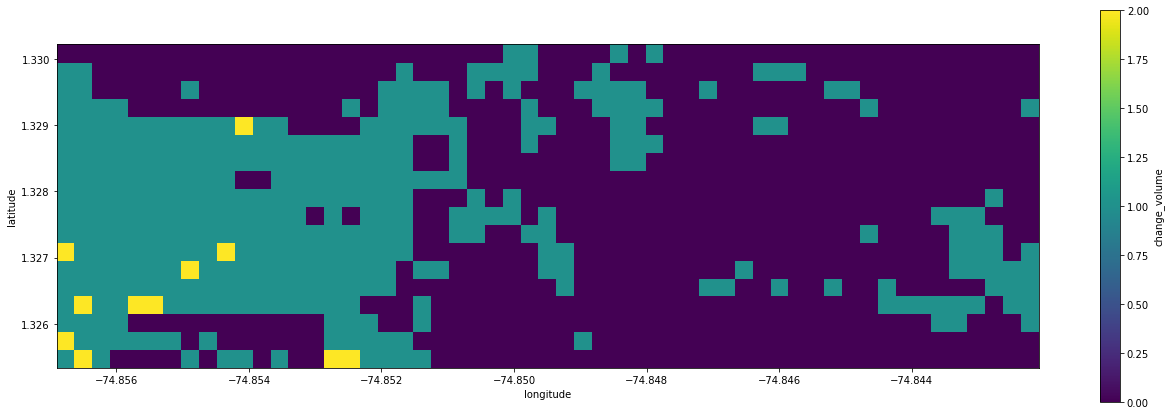

In [16]:
import  matplotlib.pyplot as plt  

plt.figure(figsize = figure_ratio(ccd_product))
ccd_product.plot()
plt.axes().set_aspect("equal")

## Time of first changes

In [17]:
%time time_map_ccd_product = ccd.process_xarray(landsat_dataset, distributed = True, process = "first") #Run process xarray on large dataset

CPU times: user 7.27 s, sys: 120 ms, total: 7.39 s
Wall time: 3min 45s


### Plot Detection Dates

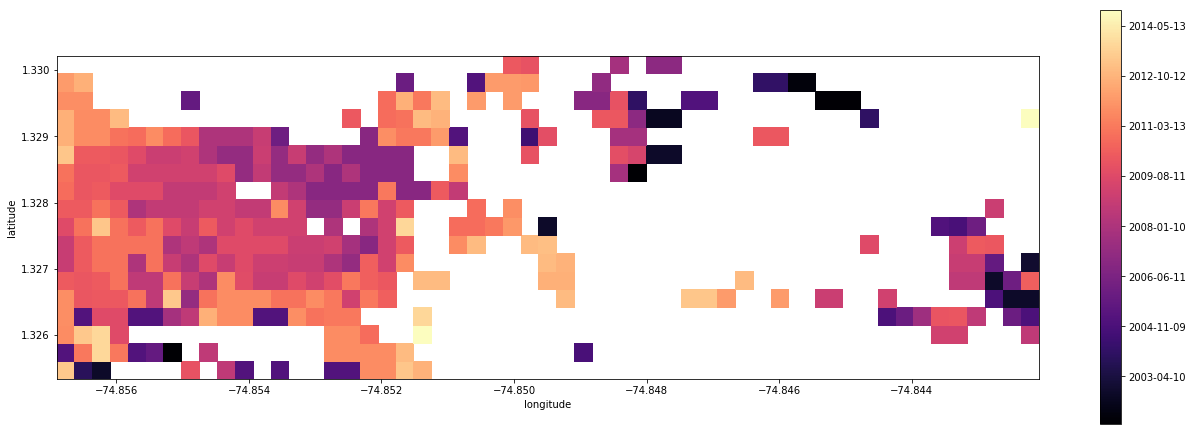

In [18]:
import datetime
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter

plt.figure(figsize = figure_ratio(time_map_ccd_product))
epochFormatter = FuncFormatter(lambda x, pos: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))
time_map_ccd_product.plot(cmap = "magma", cbar_kwargs=({'format': epochFormatter}))
plt.axes().set_aspect("equal")


<br>  

# Validating Change

In [19]:
import numpy as np  
import matplotlib.pyplot as plt

## Used to plot rgb composites of xarray. Simply pass in a dataset, adjust the 'at_index' parameter 
def rgb(dataset, at_index = 0, bands = ['red', 'green', 'blue'], paint_on_mask = []):

    rgb = np.stack([dataset[bands[0]], dataset[bands[1]], dataset[bands[2]]], axis = -1)
    max_possible = 3500
    rgb = rgb.astype(np.float32)
    rgb[rgb<0] = 0
    rgb[rgb > max_possible] = max_possible
    rgb *= 255.0/rgb.max()

    rgb = rgb.astype(int)
    rgb = rgb.astype(np.float32)
    rgb = 255-rgb
    
    rgb[rgb > 254] = 254
    rgb[rgb < 1]   = 1
    
    
    for mask, color in paint_on_mask:        
        rgb[mask] = np.array([256,256,256]) - np.array(color).astype(np.int16)
    
    if 'time' in dataset:
        plt.imshow((rgb[at_index]))
    else:
        plt.imshow(rgb)  

> ### Imagery from earlier acquisitions  
> Change starts with landcover before...    

2000-04-08T15:05:56.000000000


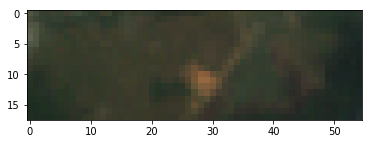

In [20]:
print( landsat_dataset.time.values[1] )
rgb(landsat_dataset, at_index = 0)

> ### Imagery from later acquisitions  
> ... and is revealed when compared to landcover after.  

2012-12-21T15:09:40.000000000


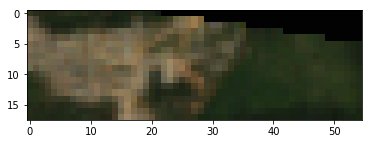

In [21]:
print( landsat_dataset.time.values[130] )
rgb(landsat_dataset, at_index = 130)


<br>
<br>
<br>

># Change within a selected Pixel

<br>
> ### Define Pixel Lat and Lon

In [22]:
## Bangladesh 
pixel_latitude = 25.228928
pixel_longitude  = 90.035790

## Colombia  
pixel_latitude = 1.3282
pixel_longitude  = -74.8549  

> ### Select a Pixel from dataset

In [23]:
target_pixel = landsat_dataset.sel(latitude = pixel_latitude, longitude = pixel_longitude, method = "nearest")

In [24]:
processed_pixel = ccd.process_pixel(target_pixel)

<br>

> ### Plot time series models  

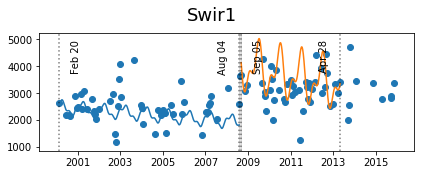

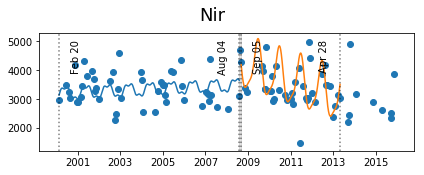

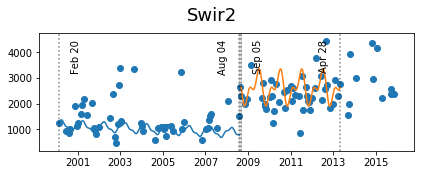

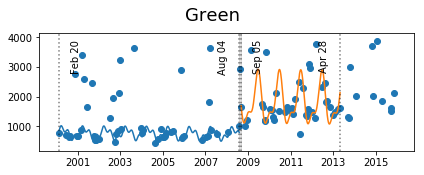

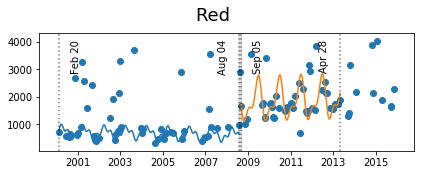

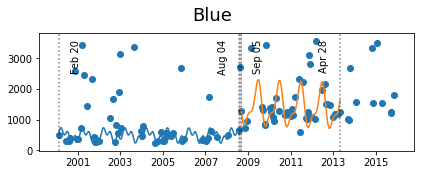

In [25]:
ccd.plot_pixel(processed_pixel)

> ### Plotting Residuals 

In [26]:
from functools import partial
from datetime import datetime, timedelta
from scipy.spatial.distance import euclidean  

def _clean_pixel(_ds, saturation_threshold=10000):
    """Filters out over-saturated values

    Creates a mask from the saturation threshold and > 0 and applies it to _ds.

    Args:
        _ds: dataset to mask
        saturation_threshold: threshold that a pixel must be below to be considered 'clean'

    Returns:
        an xArray dataset that has been masked for saturation and valid (>0) pixels
    """
    ds = _ds
    mask = (ds < saturation_threshold) & (ds >= 0)
    indices = [x for x, y in enumerate(mask.red.values) if y == True]
    return ds.isel(time=indices)


def _n64_to_datetime(n64):
    """Convert Numpy 64 bit timestamps to datetime objects. Units in seconds"""
    return datetime.utcfromtimestamp(n64.tolist() / 1e9)

def n64_to_ordinal(n64):
    dt = _n64_to_datetime(n64)
    return dt.toordinal()

def _plot_res(results=None, original_pixel=None, band=None, file_name=None):
    """Plots CCD residual for a given band. Accepts a 1x1xt xarray if a scatter-plot overlay of original acquisitions over the ccd results is needed."""

    fig = plt.figure(1, figsize =(20,5))
    fig.suptitle(band.title() + " Residual ", fontsize=18, verticalalignment='bottom')

    lastdt = None

    dateLabels = []

    for change_model in results["change_models"]:
        ax1 = fig.add_subplot(111)
        model = getattr(change_model, band)        
        time = original_pixel.sel(time = slice(datetime.fromordinal(change_model.start_day),
                                                datetime.fromordinal(change_model.end_day))
                                  ).time.values        
        ordinal_time = list(map(n64_to_ordinal , time))
        actual    = original_pixel[band].values
        
        predicted = list(map(partial(ccd._lasso_eval,bias= model.intercept, weights = model.coefficients), ordinal_time))
        residual  = list(map(lambda x: euclidean(x[0], x[1]), zip(actual, predicted)))
                
        x = time
        y = residual

        ax1.plot(x, y, label= model.coefficients)
        
        # Curve Fit Code  
        polycoeffs = np.polyfit(ordinal_time,residual,5)

        f = np.poly1d(polycoeffs)

        x_new = np.linspace(ordinal_time[0], ordinal_time[-1], 50)
        y_new = f(x_new)
        ax1.plot(x_new, y_new, c = "#333333")
        
        # Draw Vertical Lines
        dt = datetime.fromordinal(change_model.start_day)
        dateLabels.append(dt)

        if lastdt is not None:
            ax1.axvspan(lastdt, dt, color=(0, 0, 0, 0.1))

        dt = datetime.fromordinal(change_model.end_day)
        dateLabels.append(dt)

        lastdt = dt


    ymin, ymax = ax1.get_ylim()
    for idx, dt in enumerate(dateLabels):
        plt.axvline(x=dt, linestyle='dotted', color=(0, 0, 0, 0.5))
        # Top, inside
        plt.text(
            dt,
            ymax,
            "\n" +  # HACK TO FIX SPACING
            dt.strftime('%b %d') + "  \n"  # HACK TO FIX SPACING
            ,
            rotation=90,
            horizontalalignment='right' if (idx % 2) else 'left',
            verticalalignment='top')

    plt.tight_layout()

    if file_name is not None:
        _save_plot_to_file(plot=plt, file=filename, band_name=band)
    plt.show()


<br>  
> ### Remove points that don't have a `clear` designation on `pixel_qa`

In [27]:
clear_pixel = processed_pixel.where(processed_pixel.pixel_qa == 66, drop = True)

> ### Run Residual Plotting on a pixel with clear values  

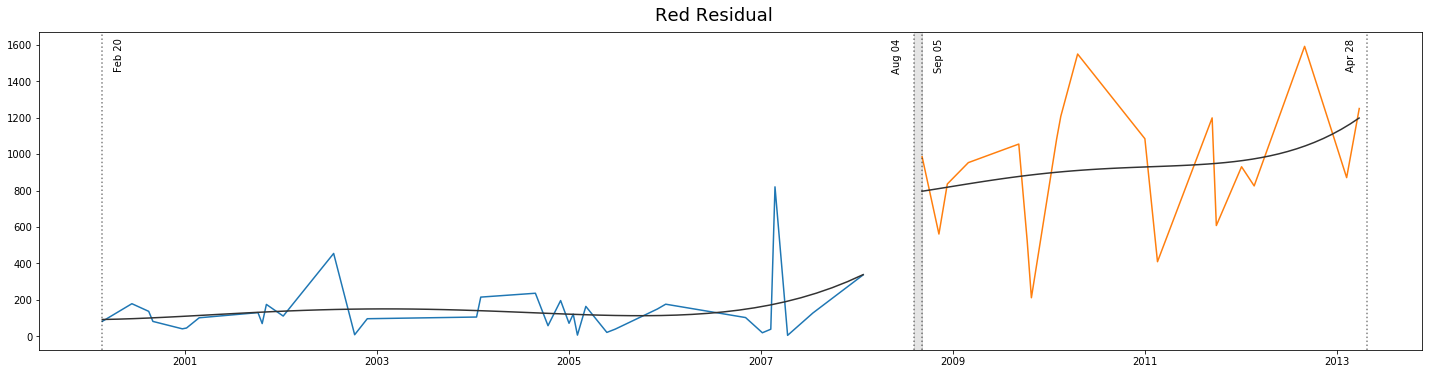

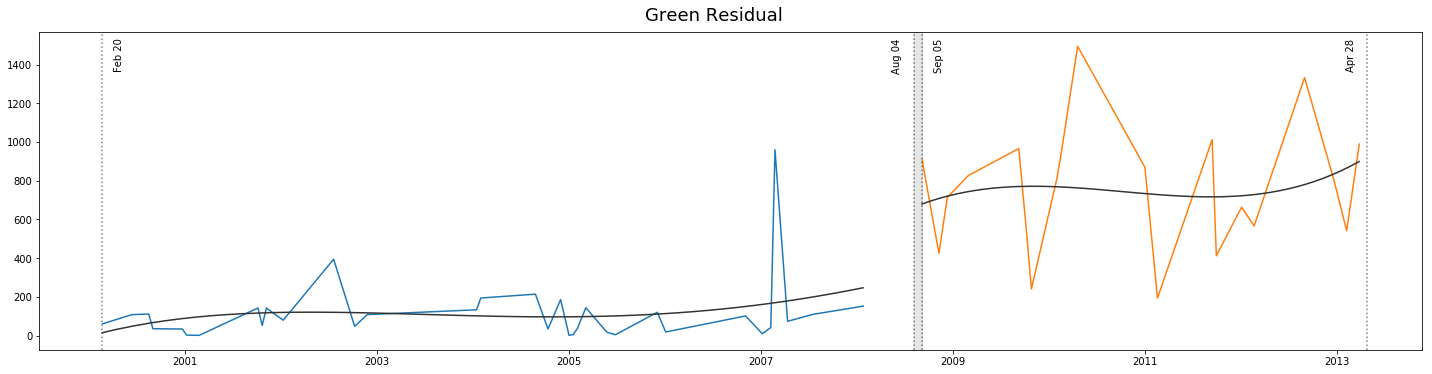

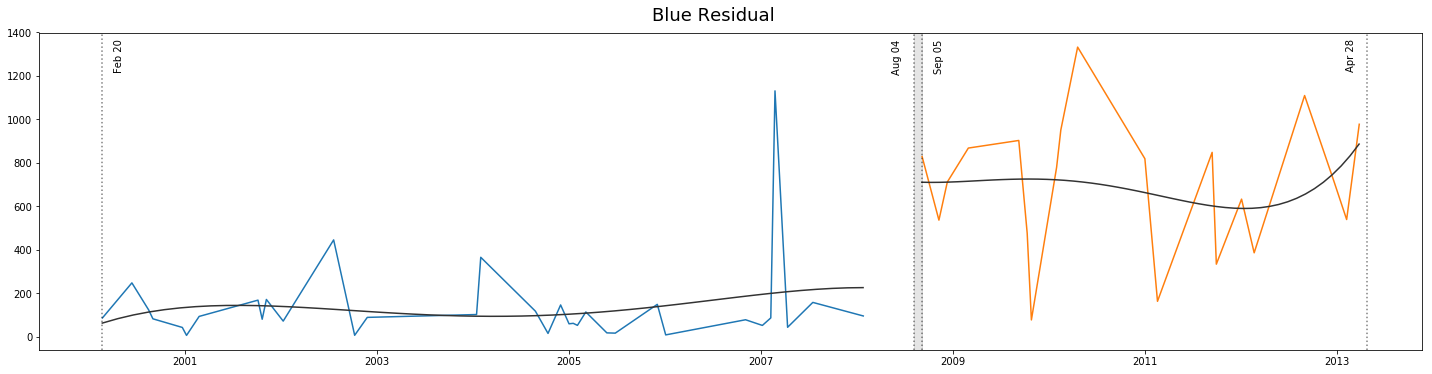

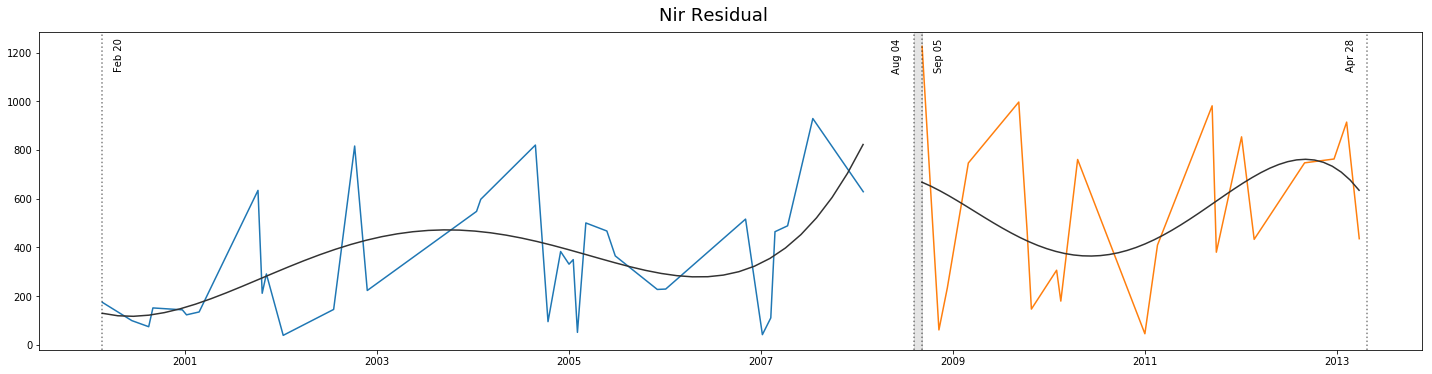

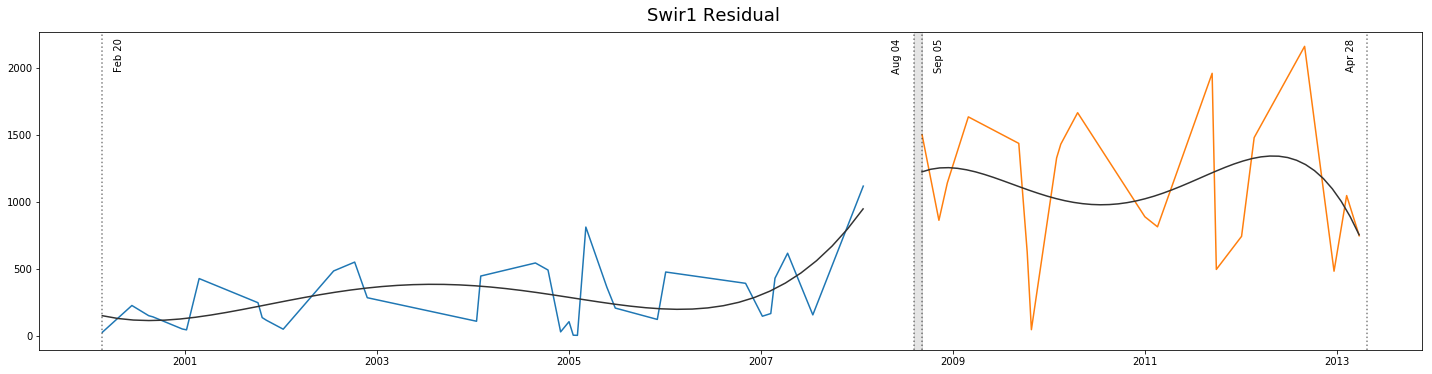

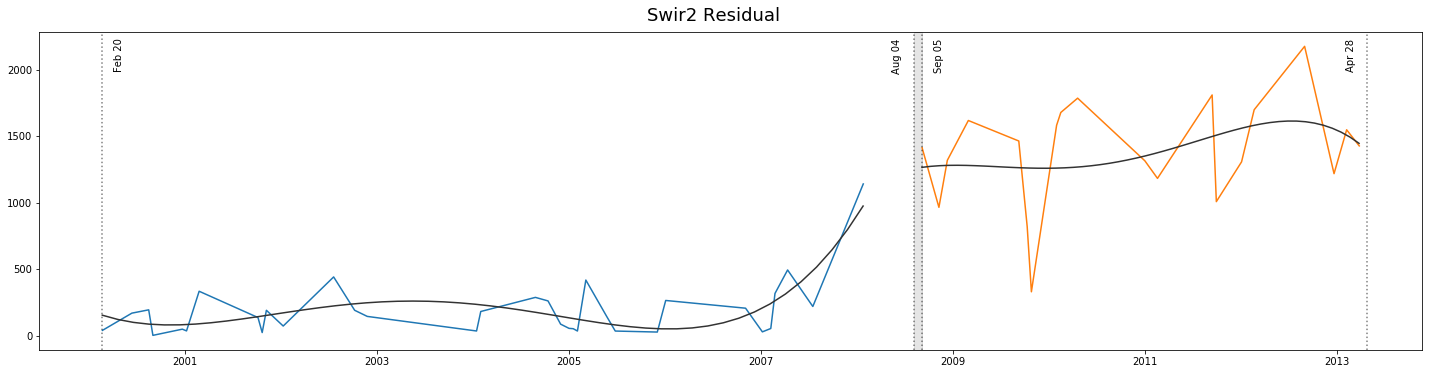

In [28]:
for band in ['red', 'green', 'blue', 'nir', 'swir1', 'swir2']:
    _plot_res(results= clear_pixel.attrs['ccd_results'],
              original_pixel=clear_pixel,
              band=band,
              file_name=None)